In [1]:
import pandas as pd 
import numpy as np 
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit

# Models
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

import math

import datetime
from datetime import datetime as dt
from dateutil.relativedelta import *
from datetime import timedelta


In [2]:
df_ada = pd.read_csv(r'../data/cryptoInd/ada_ind.csv')
close = df_ada['close']
df_ada.drop('close', axis = 1, inplace = True)
df_ada['close'] = close

In [3]:
df_ada.head(10)

Date  adj_close       low      high      open       volume     SMA30  \
0  2017-12-12   0.133891  0.114222  0.138008  0.121177   60056800.0  0.120812   
1  2017-12-13   0.134281  0.122368  0.141854  0.133739   61575000.0  0.121781   
2  2017-12-14   0.240753  0.131843  0.240753  0.133667  309307008.0  0.131850   
3  2017-12-15   0.213467  0.187032  0.233209  0.233209  207311008.0  0.138089   
4  2017-12-16   0.404665  0.204233  0.447192  0.212875  581052032.0  0.156310   
5  2017-12-17   0.513011  0.378013  0.592417  0.386775  628142976.0  0.181687   
6  2017-12-18   0.518198  0.467403  0.526496  0.511939  253463008.0  0.207447   
7  2017-12-19   0.531273  0.501083  0.589589  0.520268  279631008.0  0.233807   
8  2017-12-20   0.486151  0.441621  0.533705  0.533705  182924000.0  0.257718   
9  2017-12-21   0.477851  0.456527  0.523619  0.490049  162926000.0  0.281719   

      CMA30     EMA30        adx  ...      macd  macdsignal  macdhist  \
0  0.069668  0.109170  62.460368  ...  0.026882    0.029637 -0.002755   
1  0.071514  0.112309  61.306445  ...  0.026730    0.029055 -0.002326   
2  0.076215  0.128364  61.955125  ...  0.034799    0.030204  0.004595   
3  0.079925  0.139002  62.560561  ...  0.038548    0.031873  0.006675   
4  0.088471  0.172210  64.167611  ...  0.056299    0.036758  0.019541   
5  0.099356  0.214810  65.918033  ...  0.078207    0.045048  0.033159   
6  0.109827  0.252734  67.551760  ...  0.094894    0.055017  0.039877   
7  0.120106  0.287551  69.155242  ...  0.107930    0.065600  0.042330   
8  0.128822  0.312376  69.238259  ...  0.113313    0.075142  0.038171   
9  0.136939  0.333060  69.315741  ...  0.115578    0.083229  0.032348   

         rsi     stdev      slowk      slowd  dollar_close  sp500_close  \
0  67.297379  0.012002  57.473092  47.064895     94.080002  2664.110107   
1  67.397316  0.012455  75.356559  59.419246     93.418999  2662.850098   
2  82.785435  0.030477  89.927456  74.252369     93.478996  2652.010010   
3  73.287491  0.036393  87.065078  84.116365     93.929001  2675.810059   
4  85.648895  0.075676  88.858253  88.616929     93.929001  2675.810059   
5  88.796609  0.116306  83.227207  86.383513     93.929001  2675.810059   
6  88.921253  0.142292  84.740127  85.608529     93.519997  2690.159912   
7  89.244429  0.161868  83.969821  83.979052     93.027000  2681.469971   
8  80.555716  0.170649  80.475814  83.061921     92.890999  2679.250000   
9  79.039120  0.174560  68.035752  77.493796     92.862000  2684.570068   

      close  
0  0.133891  
1  0.134281  
2  0.240753  
3  0.213467  
4  0.404665  
5  0.513011  
6  0.518198  
7  0.531273  
8  0.486151  
9  0.477851  

[10 rows x 23 columns]

In [4]:
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=df_ada['Date'], y=df_ada['close'], name='BITCOIN', mode='lines',line=dict(color='red')))
fig2.show()

In [5]:
inicial_date = '2021-02-13'
df_ada['Date'] = pd.to_datetime(df_ada['Date'])
inicial_date = pd.to_datetime(inicial_date)
df_ada = df_ada[df_ada['Date'] >= inicial_date]

# Scaling

In [6]:
df_ada.set_index('Date', inplace=True)
scaled_df = df_ada.copy()
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(df_ada)
scaled_df = pd.DataFrame(scaled_feat, index = df_ada.index, columns=df_ada.columns)
scaled_df.head()

adj_close       low      high      open    volume     SMA30  \
Date                                                                      
2021-02-13   0.053071  0.052905  0.064893  0.062191  0.378971  0.000000   
2021-02-14   0.026764  0.044778  0.049511  0.053419  0.359014  0.014668   
2021-02-15   0.032545  0.000000  0.046710  0.026537  0.456398  0.030250   
2021-02-16   0.037108  0.056521  0.044990  0.032454  0.347739  0.044408   
2021-02-17   0.046276  0.049932  0.041400  0.037144  0.288533  0.058438   

               CMA30     EMA30       adx    bb_low  ...      macd  macdsignal  \
Date                                                ...                         
2021-02-13  0.000000  0.000000  0.910142  0.000000  ...  0.617451    0.548324   
2021-02-14  0.001650  0.010113  0.946499  0.017562  ...  0.614389    0.566729   
2021-02-15  0.003327  0.019722  0.929682  0.041494  ...  0.610537    0.580618   
2021-02-16  0.005024  0.028729  0.913987  0.063665  ...  0.605690    0.590677   
2021-02-17  0.006764  0.037815  0.892394  0.087565  ...  0.601703    0.597859   

            macdhist       rsi     stdev     slowk     slowd  dollar_close  \
Date                                                                         
2021-02-13  0.763153  0.973964  0.538724  0.877746  0.976558      0.069352   
2021-02-14  0.708716  0.824996  0.524787  0.747937  0.894459      0.069352   
2021-02-15  0.663447  0.834005  0.492144  0.635983  0.784047      0.069352   
2021-02-16  0.625070  0.841293  0.461039  0.592019  0.683358      0.072070   
2021-02-17  0.596237  0.856039  0.423695  0.670830  0.656186      0.108805   

            sp500_close     close  
Date                               
2021-02-13     0.161815  0.053071  
2021-02-14     0.161815  0.026764  
2021-02-15     0.161815  0.032545  
2021-02-16     0.159636  0.037108  
2021-02-17     0.158410  0.046276  

[5 rows x 22 columns]

# Correlation Matrix

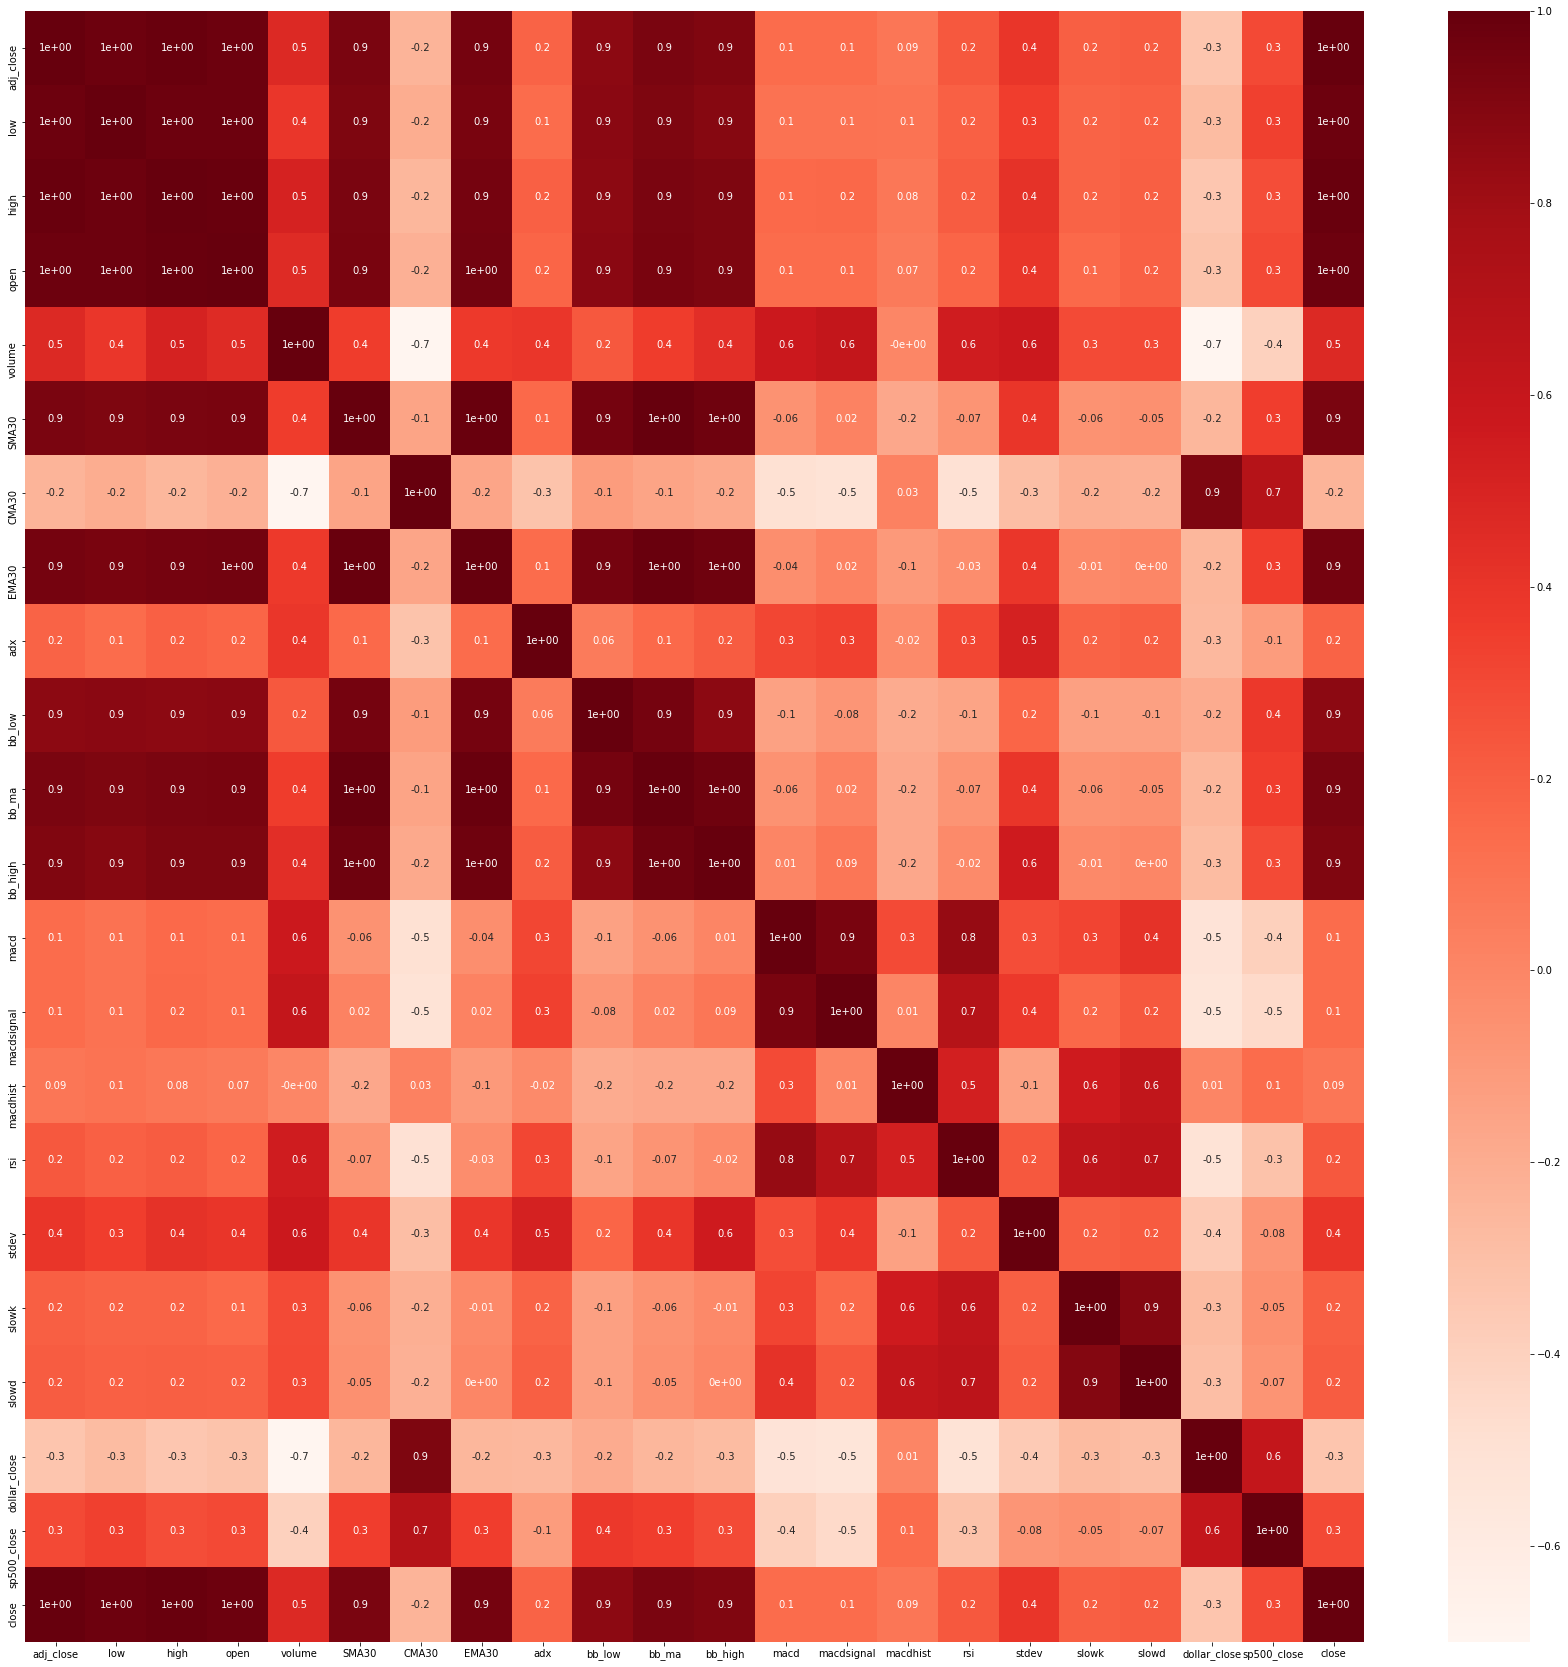

In [7]:
#Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(scaled_df.corr(method="spearman"), decimals=2)

def cor_heatmap(cor):
    plt.figure(figsize=(30,30))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()


cor_heatmap(corr)

In [8]:
scaled_df.columns

Index(['adj_close', 'low', 'high', 'open', 'volume', 'SMA30', 'CMA30', 'EMA30',
       'adx', 'bb_low', 'bb_ma', 'bb_high', 'macd', 'macdsignal', 'macdhist',
       'rsi', 'stdev', 'slowk', 'slowd', 'dollar_close', 'sp500_close',
       'close'],
      dtype='object')

In [9]:
scaled_df.drop(['low', 'adj_close', 'open','EMA30',
 'bb_ma', 'bb_high'], axis=1, inplace=True)

## TimeBaseCV

In [10]:
import pandas as pd
import datetime
from datetime import datetime as dt
from dateutil.relativedelta import *

# code from: https://towardsdatascience.com/time-based-cross-validation-d259b13d42b8"

class TimeBasedCV(object):
    '''
    Parameters 
    ----------
    train_period: int
        number of time units to include in each train set
        default is 30
    test_period: int
        number of time units to include in each test set
        default is 7
    freq: string
        frequency of input parameters. possible values are: days, months, years, weeks, hours, minutes, seconds
        possible values designed to be used by dateutil.relativedelta class
        deafault is days
    '''
    
    
    def __init__(self, train_period=30, test_period=7, freq='days'):
        self.train_period = train_period
        self.test_period = test_period
        self.freq = freq

        
        
    def split(self, data, validation_split_date=None, date_column='record_date', gap=0):
        '''
        Generate indices to split data into training and test set
        
        Parameters 
        ----------
        data: pandas DataFrame
            your data, contain one column for the record date 
        validation_split_date: datetime.date()
            first date to perform the splitting on.
            if not provided will set to be the minimum date in the data after the first training set
        date_column: string, deafult='record_date'
            date of each record
        gap: int, default=0
            for cases the test set does not come right after the train set,
            *gap* days are left between train and test sets
        
        Returns 
        -------
        train_index ,test_index: 
            list of tuples (train index, test index) similar to sklearn model selection
        '''
        
        # check that date_column exist in the data:
        try:
            data[date_column]
        except:
            raise KeyError(date_column)
                    
        train_indices_list = []
        test_indices_list = []

        if validation_split_date==None:
            validation_split_date = data[date_column].min().date() + eval('relativedelta('+self.freq+'=self.train_period)')
        
        start_train = validation_split_date - eval('relativedelta('+self.freq+'=self.train_period)')
        end_train = start_train + eval('relativedelta('+self.freq+'=self.train_period)')
        start_test = end_train + eval('relativedelta('+self.freq+'=gap)')
        end_test = start_test + eval('relativedelta('+self.freq+'=self.test_period)')

        while end_test < data[date_column].max().date():
            # train indices:
            cur_train_indices = list(data[(data[date_column].dt.date>=start_train) & 
                                     (data[date_column].dt.date<end_train)].index)

            # test indices:
            cur_test_indices = list(data[(data[date_column].dt.date>=start_test) &
                                    (data[date_column].dt.date<end_test)].index)
            
            #print("Train period:",start_train,"-" , end_train, ", Test period", start_test, "-", end_test,
            #      "# train records", len(cur_train_indices), ", # test records", len(cur_test_indices))

            train_indices_list.append(cur_train_indices)
            test_indices_list.append(cur_test_indices)

            # update dates:
            start_train = start_train + eval('relativedelta('+self.freq+'=self.test_period)')
            end_train = start_train + eval('relativedelta('+self.freq+'=self.train_period)')
            start_test = end_train + eval('relativedelta('+self.freq+'=gap)')
            end_test = start_test + eval('relativedelta('+self.freq+'=self.test_period)')

        # mimic sklearn output  
        index_output = [(train,test) for train,test in zip(train_indices_list,test_indices_list)]

        self.n_splits = len(index_output)
        
        return index_output
    
    
    def get_n_splits(self):
        """Returns the number of splitting iterations in the cross-validator
        Returns
        -------
        n_splits : int
            Returns the number of splitting iterations in the cross-validator.
        """
        return self.n_splits

# Models

## Function to Apply the Models

In [37]:
def add_days(df, forecast_length):
    end_point = len(df)
    df1 = pd.DataFrame(index=range(forecast_length), columns=range(2))
    df1.columns = ['close', 'Date']
    df = df.append(df1)
    df = df.reset_index(drop=True)
    x = df.at[end_point - 1, 'Date']
    x = pd.to_datetime(x, format='%Y-%m-%d')
    for i in range(forecast_length):
        df.at[df.index[end_point + i], 'Date'] = x + timedelta(days=1+i)
        df.at[df.index[end_point + i], 'close'] = 0
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df = df.drop(['Date'], axis=1)
    return df

In [38]:
def forecasting(model,df1, forecast_length):
    df3 = df1[['close', 'Date']]
    df3 = add_days(df3, forecast_length)
    finaldf = df1.drop('Date', axis=1)
    finaldf = finaldf.reset_index(drop=True)
    end_point = len(finaldf)
    x = end_point - forecast_length
    finaldf_train = finaldf.loc[:x - 1, :]
    finaldf_train_x = finaldf_train.loc[:, finaldf_train.columns != 'close']
    finaldf_train_y = finaldf_train['close']

    fit = model.fit(finaldf_train_x, finaldf_train_y)
    yhat = []
    end_point = len(finaldf)
    df3_end = len(df3)
    for i in range(forecast_length, 0, -1):
        y = end_point - i
        inputfile = finaldf.loc[y:end_point, :]
        inputfile_x = inputfile.loc[:, inputfile.columns != 'close']
        pred_set = inputfile_x.head(1)
        pred = fit.predict(pred_set)
        df3.at[df3.index[df3_end - i], 'close'] = pred[0]
        finaldf = df1.drop('Date', axis=1)
        finaldf = finaldf.reset_index(drop=True)
        yhat.append(pred)
    yhat = np.array(yhat)
    return yhat

In [66]:
def show_results(df_results, df,objetive,train_period_split,test_period_split, *args):
    #Scalling
    scaler = MinMaxScaler()
    scaled_feat = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_feat, index = df.index, columns=df.columns)

    X_scaled = scaled_df.drop(objetive, axis=1)
    y_scaled = scaled_df[objetive]

    X_tbcv = X_scaled.reset_index()
    y_scaled = y_scaled.reset_index()
    y_scaled['Date'] = pd.to_datetime(y_scaled['Date'], format='%Y-%m-%d')   
    X_tbcv['Date'] = pd.to_datetime(X_tbcv['Date'], format='%Y-%m-%d')                
    tscv = TimeBasedCV(train_period=train_period_split,
        test_period=test_period_split,
        freq='days')
    colours =['red', 'blue', 'yellow', 'pink']
    fig2 = go.Figure()
    count = 0
    for idx,arg in enumerate(args):
        for train_index, test_index in tscv.split(X_tbcv,date_column='Date'):
            X_train = X_tbcv.loc[train_index]
            y_train = y_scaled.loc[train_index]
            X_train['close'] = y_train['close']
            y_test  = y_scaled.loc[test_index]
            X_test = X_tbcv.loc[test_index]
            X_test.set_index('Date', inplace=True)
            y_test.set_index('Date', inplace=True)
            mae_list = []
            mse_list = []
            r2_list = []
            rmse_list = []
            y_pred_test = forecasting(model=arg,df1=X_train,forecast_length=test_period_split)
            # prints metric results         
            value_mae = mean_absolute_error(y_test, y_pred_test)
            value_mse = mean_squared_error(y_test, y_pred_test)
            value_r2 = r2_score(y_test, y_pred_test)
            value_rmse = math.sqrt(value_mse)
            #print(value_mae, value_mse, value_r2)
            # append the accuracies, the time and the number of iterations in the corresponding list
            mae_list.append(value_mae)
            mse_list.append(value_mse)
            r2_list.append(value_r2)
            rmse_list.append(value_rmse)

            real_name = 'real '+ str(X_test.index.min().day)+"-"+ str(X_test.index.min().month)+"-"+ str(X_test.index.min().year)+" to "\
                + str(X_test.index.max().day)+"-"+ str(X_test.index.max().month)+"-"+ str(X_test.index.max().year)
            pred_name = 'pred '+ str(X_test.index.min().day)+"-"+ str(X_test.index.min().month)+"-"+ str(X_test.index.min().year)+" to"\
                + str(X_test.index.max().day)+"-"+ str(X_test.index.max().month)+"-"+ str(X_test.index.max().year)
            X_train['close'] = y_train['close']
            X_pred_test = X_test.copy()
            X_test['close'] = y_test['close']
            X_pred_test['close'] = y_pred_test
            X_pred_test_undo = scaler.inverse_transform(X_pred_test)
            X_test_undo = scaler.inverse_transform(X_test)

            X_pred_test_graphic = pd.DataFrame(data = X_pred_test_undo, index = X_pred_test.index, columns=X_pred_test.columns)
            X_test_graphic = pd.DataFrame(data =X_test_undo, index = X_test.index, columns=X_test.columns)

            fig2.add_trace(go.Scatter(x=X_test_graphic.index, y=X_test_graphic['close'], name=real_name, mode='lines',line=dict(color='green')))
            fig2.add_trace(go.Scatter(x=X_pred_test_graphic.index, y=X_pred_test_graphic['close'], name=pred_name, mode='lines', line=dict(color=colours[idx])))

        fig2.update_layout(dict(updatemenus=[
                                dict(
                                type = "buttons",
                                direction = "left",
                                buttons=list([
                                        dict(
                                        args=["visible", "legendonly"],
                                        label="Deselect All",
                                        method="restyle"
                                        ),
                                        dict(
                                        args=["visible", True],
                                        label="Select All",
                                        method="restyle"
                                        )
                                ]),
                                pad={"r": 10, "t": 10},
                                showactive=False,
                                x=1,
                                xanchor="right",
                                y=1.1,
                                yanchor="top"
                                ),
                        ]
                ))
        mae = round(np.mean(mae_list),10)
        mse = round(np.mean(mse_list),10)
        r2 = round(np.mean(r2_list),10)
        rmse = round(np.mean(rmse_list),10)
        df_results.iloc[count] = mae, mse,rmse, r2
        count+=1
    fig2.show()
    return df_results
        
    

In [59]:
def avg_score(model, X, splits,objetive = 'close',split_method = 'tscv', train_period_split = 30,test_period_split=7):
        #final dataset
        df=pd.DataFrame()

        #Scalling
        scaler = MinMaxScaler()
        scaled_feat = scaler.fit_transform(X)
        scaled_df = pd.DataFrame(scaled_feat, index = X.index, columns=X.columns)

        X_scaled = scaled_df.drop(objetive, axis=1)
        y_scaled = scaled_df[objetive]

        # create lists to store the results from the different models 
        mae_list = []
        mse_list = []
        r2_list = []
        rmse_list =[]
        flag = 0 # feat sel flag to not keep printing 
    
        if split_method == 'hmcv':
                X_tbcv = X_scaled.reset_index()
                y_scaled = y_scaled.reset_index()
                y_scaled['Date'] = pd.to_datetime(y_scaled['Date'], format='%Y-%m-%d')   
                X_tbcv['Date'] = pd.to_datetime(X_tbcv['Date'], format='%Y-%m-%d')                
                tscv = TimeBasedCV(train_period=train_period_split,
                        test_period=test_period_split,
                        freq='days')

                fig = make_subplots(rows=1, cols=1)
                fig2 = go.Figure()

                for train_index, test_index in tscv.split(X_tbcv,date_column='Date'):
                        X_train = X_tbcv.loc[train_index]
                        y_train = y_scaled.loc[train_index]
                        X_test  = X_tbcv.loc[test_index]
                        y_test  = y_scaled.loc[test_index]
                        X_train.set_index('Date', inplace=True) 
                        y_train.set_index('Date', inplace=True)             
                        X_test.set_index('Date', inplace=True)
                        y_test.set_index('Date', inplace=True)


                        # applies the model 
                        model_fit = model.fit(X_train, y_train)
                        #predicts validation 
                        y_pred_test = model_fit.predict(X_test)
                
                        # prints metric results         
                        value_mae = mean_absolute_error(y_test, y_pred_test)
                        value_mse = mean_squared_error(y_test, y_pred_test)
                        value_rmse = math.sqrt(value_mse)
                        value_r2 = r2_score(y_test, y_pred_test)
                        # append the accuracies, the time and the number of iterations in the corresponding list
                        mae_list.append(value_mae)
                        mse_list.append(value_mse)
                        r2_list.append(value_r2)
                        rmse_list.append(value_rmse)
              

                
                        real_name = 'real '+ str(X_test.index.min().day)+"-"+ str(X_test.index.min().month)+"-"+ str(X_test.index.min().year)+" to "\
                                   + str(X_test.index.max().day)+"-"+ str(X_test.index.max().month)+"-"+ str(X_test.index.max().year)
                        pred_name = 'pred '+ str(X_test.index.min().day)+"-"+ str(X_test.index.min().month)+"-"+ str(X_test.index.min().year)+" to"\
                                   + str(X_test.index.max().day)+"-"+ str(X_test.index.max().month)+"-"+ str(X_test.index.max().year)+" "

                        X_train['close'] = y_train
                        X_pred_test = X_test.copy()
                        X_test['close'] = y_test
                        X_pred_test['close'] = y_pred_test

                        X_pred_test_undo = scaler.inverse_transform(X_pred_test)
                        X_test_undo = scaler.inverse_transform(X_test)

                        X_pred_test_graphic = pd.DataFrame(data = X_pred_test_undo, index = X_pred_test.index, columns=X_pred_test.columns)
                        X_test_graphic = pd.DataFrame(data =X_test_undo, index = X_test.index, columns=X_test.columns)

                        fig2.add_trace(go.Scatter(x=X_test_graphic.index, y=X_test_graphic['close'], name=real_name, mode='lines',line=dict(color='green')))
                        fig2.add_trace(go.Scatter(x=X_pred_test_graphic.index, y=X_pred_test_graphic['close'], name=pred_name, mode='lines', line=dict(color='red')))
                        
                        #df.append(y_pred_test)
                
                model_name = str(model)+"Number of Splits: "+ str(tscv.get_n_splits())
        
                fig2.update_layout(dict(updatemenus=[
                                dict(
                                type = "buttons",
                                direction = "left",
                                buttons=list([
                                        dict(
                                        args=["visible", "legendonly"],
                                        label="Deselect All",
                                        method="restyle"
                                        ),
                                        dict(
                                        args=["visible", True],
                                        label="Select All",
                                        method="restyle"
                                        )
                                ]),
                                pad={"r": 10, "t": 10},
                                showactive=False,
                                x=1,
                                xanchor="right",
                                y=1.1,
                                yanchor="top"
                                ),
                        ]
                ))

                fig2.update_layout(height=1000, width=1000,
                title_text=model_name)
                fig2.show()     


        
        elif split_method == 'tscv':
                fig = make_subplots(rows=splits, cols=1)
                #Splitting to Training set and Test set
                timesplit= TimeSeriesSplit(n_splits=splits)
                flag = 1
                for train_index, test_index in timesplit.split(X):
                        X_train, X_val = X[:len(train_index)], X[len(train_index): (len(train_index)+len(test_index))]
                        y_train, y_val = y[:len(train_index)].values.ravel(), y[len(train_index): (len(train_index)+len(test_index))].values.ravel()
                        # applies the model 
                        model_fit = model.fit(X_train, y_train)
                        #predicts validation 
                        y_pred_val = model_fit.predict(X_val)
                
                        # prints metric results         
                        #metrics(X_train, X_val, y_train, y_pred_train, y_val, y_pred_val, model)
                        value_mae = mean_absolute_error(y_val, y_pred_val)
                        value_mse = mean_squared_error(y_val, y_pred_val)
                        value_r2 = r2_score(y_val, y_pred_val)
                        print(value_r2)
                        # append the accuracies, the time and the number of iterations in the corresponding list
                        mae_list.append(value_mae)
                        mse_list.append(value_mse)
                        r2_list.append(value_r2)

                
                        title_y = "Value from "+str(X_val.index.min())+" to "+str(X_val.index.max())
                        
                        fig.add_trace(go.Scatter(x=X_val.index, y=y_val, name='real', mode='lines', line=dict(color="#0000ff")),
                        row=flag,col=1)
                        fig.add_trace(go.Scatter(x=X_val.index, y=y_pred_val, name='prediction', mode='lines', line=dict(color="#0000ff")),
                        row=flag,col=1)
                        fig.update_xaxes(title_text= title_y, row=flag, col=1, title_font_size=10)
                        
                        flag+=1
                        
                model_name = str(rf_se)

                fig.update_layout(height=1000, width=1000,
                        title_text=model_name)
                fig.show()

        
        
  
        avg_mae = round(np.mean(mae_list),3)
        std_mae = round(np.std(mae_list),2)
        avg_mse = round(np.mean(mse_list),3)
        std_mse = round(np.std(mse_list),2)
        avg_rmse = round(np.mean(rmse_list),3)
        std_rmse = round(np.std(rmse_list),2)
        avg_r2 = round(np.mean(r2_list),3)
        std_r2 = round(np.std(r2_list),2)

        print(str(avg_mae) + '+/-' + str(std_mae),str(avg_rmse) + '+/-' + str(std_rmse),\
            str(avg_mse) + '+/-' + str(std_mse) , str(avg_r2) + '+/-' + str(std_r2) )
        return df

## Random Forest

In [67]:
rf_se = RandomForestRegressor(random_state=10,criterion='mse')
rf_ae = RandomForestRegressor(random_state=10,criterion='mae')
df = pd.DataFrame(columns = ['MAE', 'MSE','RMSE','R2'], index = ['mse','mae'])
show_results(df, df_ada,'close',100,5, rf_se, rf_ae)

MAE       MSE      RMSE        R2
mse  0.013759  0.000221  0.014858 -0.970534
mae  0.013069  0.000208  0.014417 -0.855327

In [16]:
rf_5 = RandomForestRegressor(random_state=10,criterion='mae', max_depth=5)
rf_20 = RandomForestRegressor(random_state=10,criterion='mae', max_depth=20)
rf_50 = RandomForestRegressor(random_state=10,criterion='mae', max_depth=50)
df = pd.DataFrame(columns = ['MAE', 'MSE','RMSE', 'R2'], index = ['5','20', '50'])
show_results(df, df_ada,'close',100,5,rf_5, rf_20,rf_50)

MAE       MSE      RMSE        R2
5   0.012538  0.000192   0.01386 -0.714719
20  0.013069  0.000208  0.014417 -0.855327
50  0.013069  0.000208  0.014417 -0.855327

In [17]:
rf_auto = RandomForestRegressor(random_state=10,criterion='mae', max_depth=5, max_features='auto')
rf_sqrt = RandomForestRegressor(random_state=10,criterion='mae', max_depth=5, max_features='sqrt')
rf_log2 = RandomForestRegressor(random_state=10,criterion='mae', max_depth=5,max_features='log2' )
df = pd.DataFrame(columns = ['MAE', 'MSE','RMSE', 'R2'], index = ['auto','sqrt', 'log2'])
show_results(df, df_ada,'close',100,5,rf_auto, rf_sqrt,rf_log2)

MAE       MSE     RMSE        R2
auto  0.012538  0.000192  0.01386 -0.714719
sqrt  0.011245  0.000162  0.01272 -0.444254
log2  0.011245  0.000162  0.01272 -0.444254

In [18]:
rf_10 = RandomForestRegressor(random_state=10,criterion='mae', max_depth=5, max_features='sqrt', n_estimators=50)
rf_20 = RandomForestRegressor(random_state=10,criterion='mae', max_depth=5, max_features='sqrt',n_estimators=100)
rf_30 = RandomForestRegressor(random_state=10,criterion='mae', max_depth=5,max_features='sqrt', n_estimators=150)
df = pd.DataFrame(columns = ['MAE', 'MSE','RMSE', 'R2'], index = ['50','100', '150'])
show_results(df, df_ada,'close',100,5,rf_10, rf_20,rf_30)

MAE       MSE      RMSE        R2
50   0.010839  0.000165  0.012838 -0.471141
100  0.011245  0.000162   0.01272 -0.444254
150  0.011011   0.00015  0.012243 -0.337833

In [19]:
rf_final = RandomForestRegressor(random_state=10,criterion='mae', max_depth=5, max_features='sqrt', n_estimators=150)
df = pd.DataFrame(columns = ['MAE', 'MSE','RMSE', 'R2'], index = ['final'])
show_results(df, df_ada,'close',100,5, rf_final)

MAE      MSE      RMSE        R2
final  0.011011  0.00015  0.012243 -0.337833

## Gradient Boost

In [20]:
gb_mae = GradientBoostingRegressor(random_state = 10 , criterion='mae')
gb_mse = GradientBoostingRegressor(random_state = 10 , criterion='mse')

df = pd.DataFrame(columns = ['MAE', 'MSE','RMSE','R2'], index = ['mae','mse'])
show_results(df, df_ada,'close',100,5,gb_mae, gb_mse)

MAE       MSE      RMSE        R2
mae  0.013154  0.000226  0.015023  -1.01449
mse  0.013185  0.000229  0.015132 -1.043681

In [25]:
gb_50 = GradientBoostingRegressor(random_state = 10 , criterion='mse', n_estimators = 50)
gb_100 = GradientBoostingRegressor(random_state = 10 , criterion='mse', n_estimators = 100)
gb_150 = GradientBoostingRegressor(random_state = 10 , criterion='mse', n_estimators = 150)
df = pd.DataFrame(columns = ['MAE', 'MSE','RMSE','R2'], index = ['50','100', '150'])
show_results(df, df_ada,'close',100,5,gb_50, gb_100, gb_150)

MAE       MSE      RMSE        R2
50   0.013393  0.000235  0.015337 -1.099503
100  0.013185  0.000229  0.015132 -1.043681
150  0.013189  0.000229  0.015136 -1.044759

In [26]:
gb_auto = GradientBoostingRegressor(random_state = 10 , criterion='mse', n_estimators = 100, max_features=  'auto' )
gb_sqrt = GradientBoostingRegressor(random_state = 10 , criterion='mse', n_estimators = 100, max_features = 'sqrt')
gb_log2 = GradientBoostingRegressor(random_state = 10 , criterion='mse', n_estimators = 100, max_features=  'log2')
df = pd.DataFrame(columns = ['MAE', 'MSE','RMSE','R2'], index = ['auto','sqrt', 'log2'])
show_results(df, df_ada,'close',100,5,gb_auto, gb_sqrt, gb_log2)

MAE       MSE      RMSE        R2
auto  0.013185  0.000229  0.015132 -1.043681
sqrt  0.008044  0.000091  0.009539  0.187838
log2  0.008044  0.000091  0.009539  0.187838

In [27]:
gb_final = GradientBoostingRegressor(random_state = 10 , criterion='mse', n_estimators = 100, max_features=  'log2')
df = pd.DataFrame(columns = ['MAE', 'MSE','RMSE','R2'], index = ['final'])
show_results(df, df_ada,'close',100,5,gb_final)

MAE       MSE      RMSE        R2
final  0.008044  0.000091  0.009539  0.187838

## Neural Nerworks

In [24]:
nn_2525 = MLPRegressor(hidden_layer_sizes=(25,25), random_state=15,max_iter = 3000)
nn_10101010 = MLPRegressor(hidden_layer_sizes=(10,10,10,10), random_state=15,max_iter = 3000)
nn_10 = MLPRegressor(hidden_layer_sizes=(10), random_state=15,max_iter = 3000)

df = pd.DataFrame(columns = ['MAE', 'MSE', 'RMSE','R2'], index = ['2525','101010', '10'])
show_results(df, df_ada,'close',100,5,nn_2525, nn_10101010, nn_10)

MAE       MSE      RMSE          R2
2525    0.133129    0.0178  0.133415 -157.875018
101010  0.025349  0.000687  0.026206   -5.129975
10      0.032592  0.001527  0.039082  -12.633167

In [28]:
nn_identity = MLPRegressor(activation = 'identity',hidden_layer_sizes=(10,10,10,10), random_state=15,max_iter = 3000)
nn_logistic = MLPRegressor(activation = 'logistic',hidden_layer_sizes=(10,10,10,10), random_state=15,max_iter = 3000)
nn_tanh = MLPRegressor(activation = 'tanh',hidden_layer_sizes=(10,10,10,10), random_state=15,max_iter = 3000)
nn_relu = MLPRegressor(activation = 'relu',hidden_layer_sizes=(10,10,10,10), random_state=15,max_iter = 3000)

df = pd.DataFrame(columns = ['MAE', 'MSE', 'RMSE','R2'], index = ['identity','logistic', 'tanh', 'relu'])
show_results(df, df_ada,'close',100,5,nn_identity, nn_logistic, nn_tanh, nn_relu)

MAE       MSE      RMSE        R2
identity  0.021674  0.000549  0.023425 -3.897764
logistic  0.011028  0.000167  0.012925 -0.490992
tanh      0.014466   0.00027  0.016432 -1.409915
relu      0.025349  0.000687  0.026206 -5.129975

In [30]:
nn_lbfgs = MLPRegressor(solver = 'lbfgs', activation = 'identity',hidden_layer_sizes=(10,10,10,10), random_state=15,max_iter = 3000)
nn_sgd = MLPRegressor(solver = 'sgd', activation = 'identity',hidden_layer_sizes=(10,10,10,10), random_state=15,max_iter = 3000)
nn_adam = MLPRegressor(solver = 'adam', activation = 'identity',hidden_layer_sizes=(10,10,10,10), random_state=15,max_iter = 3000)

df = pd.DataFrame(columns = ['MAE', 'MSE', 'RMSE','R2'], index = ['lbfgs','sgd', 'adam'])
show_results(df, df_ada,'close',100,5,nn_lbfgs, nn_sgd, nn_adam)

MAE       MSE      RMSE         R2
lbfgs  0.008205  0.000095  0.009736   0.153949
sgd    0.058944  0.003882  0.062303 -33.647156
adam   0.021674  0.000549  0.023425  -3.897764

In [32]:
nn_constant = MLPRegressor(learning_rate = 'constant',solver = 'lbfgs', activation = 'identity',
hidden_layer_sizes=(10,10,10,10), random_state=15,max_iter = 3000)
nn_invscaling = MLPRegressor(learning_rate = 'invscaling',solver = 'lbfgs', activation = 'identity',
hidden_layer_sizes=(10,10,10,10), random_state=15,max_iter = 3000)
nn_adaptive = MLPRegressor(learning_rate = 'adaptive',solver = 'lbfgs', activation = 'identity',
hidden_layer_sizes=(10,10,10,10), random_state=15,max_iter = 3000)

df = pd.DataFrame(columns = ['MAE', 'MSE', 'RMSE','R2'], index = ['constant','invscaling', 'adaptive'])
show_results(df, df_ada,'close',100,5,nn_constant, nn_invscaling, nn_adam)

MAE       MSE      RMSE        R2
constant    0.008205  0.000095  0.009736  0.153949
invscaling  0.008205  0.000095  0.009736  0.153949
adaptive    0.021674  0.000549  0.023425 -3.897764

In [34]:
nn_final = MLPRegressor(learning_rate = 'constant',solver = 'lbfgs', activation = 'identity',
hidden_layer_sizes=(10,10,10,10), random_state=15,max_iter = 3000)

df = pd.DataFrame(columns = ['MAE', 'MSE', 'RMSE','R2'], index = ['final'])
show_results(df, df_ada,'close',100,5,nn_final)

MAE       MSE      RMSE        R2
final  0.008205  0.000095  0.009736  0.153949

## XGBoost

In [69]:
xgb_mae = XGBRegressor(random_state = 10 , criterion='absolute_error')
xgb_mse = XGBRegressor(random_state = 10 , criterion='squared_error')

df = pd.DataFrame(columns = ['MAE', 'MSE','RMSE', 'R2'], index = ['mae','mse'])
show_results(df, df_ada,'close',100,5,xgb_mae, xgb_mse)

[18:16:24] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:16:24] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:16:25] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.

MAE       MSE      RMSE        R2
mae  0.013316  0.000288  0.016981 -1.573809
mse  0.013316  0.000288  0.016981 -1.573809

In [73]:
xgb_150 = XGBRegressor(random_state = 10 , n_estimators=150)
xgb_200 = XGBRegressor(random_state = 10 , n_estimators=200)
xgb_250 = XGBRegressor(random_state = 10 , n_estimators=250)

df = pd.DataFrame(columns = ['MAE', 'MSE','RMSE', 'R2'], index = ['150','200','250'])
show_results(df, df_ada,'close',100,5,xgb_150, xgb_200,xgb_250)

MAE       MSE      RMSE        R2
150  0.013316  0.000288  0.016981 -1.573809
200  0.013316  0.000288  0.016981 -1.573809
250  0.013316  0.000288  0.016981 -1.573809

In [74]:
xgb_gbtree = XGBRegressor(random_state = 10 , booster= 'gbtree', n_estimators = 130)
xgb_gblinear = XGBRegressor(random_state = 10 , booster= 'gblinear', n_estimators = 130)
xgb_dart = XGBRegressor(random_state = 10 , booster= 'dart', n_estimators = 130)
df = pd.DataFrame(columns = ['MAE', 'MSE','RMSE', 'R2'], index = ['gbtree','gblinear','dart'])

show_results(df, df_ada,'close',100,5,xgb_gbtree, xgb_gblinear,xgb_dart )

MAE       MSE      RMSE        R2
gbtree    0.013316  0.000288  0.016981 -1.573809
gblinear  0.006868  0.000066  0.008128  0.410345
dart      0.013316  0.000288  0.016981 -1.573833

In [75]:
xgb_true = XGBRegressor(random_state = 10 , booster= 'gblinear', n_estimators = 130, validate_parameters = True)
xgb_false = XGBRegressor(random_state = 10 , booster= 'gblinear', n_estimators = 130, validate_parameters = False)

df = pd.DataFrame(columns = ['MAE', 'MSE','RMSE', 'R2'], index = ['True','False'])
show_results(df, df_ada,'close',100,5,xgb_true, xgb_false)

MAE       MSE      RMSE        R2
True   0.007914  0.000095  0.009728  0.155336
False  0.015307  0.000285   0.01688 -1.543393

In [76]:
xgb_false = XGBRegressor(random_state = 10 , booster= 'gblinear', n_estimators = 130, validate_parameters = True,disable_default_eval_metric=False)
xgb_true = XGBRegressor(random_state = 10 , booster= 'gblinear', n_estimators = 130, validate_parameters = True,disable_default_eval_metric=True)

df = pd.DataFrame(columns = ['MAE', 'MSE','RMSE', 'R2'], index = ['True','False'])
show_results(df, df_ada,'close',100,5,xgb_true, xgb_false)

MAE       MSE      RMSE        R2
True   0.008179  0.000119  0.010929  -0.06619
False  0.007616   0.00009  0.009486  0.196866

In [79]:
xgb_005 = XGBRegressor(random_state = 10 , booster= 'gblinear', n_estimators = 130, validate_parameters = True,disable_default_eval_metric=False,eta = 0.05)
xgb_01 = XGBRegressor(random_state = 10 , booster= 'gblinear', n_estimators = 130, validate_parameters = True,disable_default_eval_metric=False,eta = 0.1)
xgb_03 = XGBRegressor(random_state = 10 , booster= 'gblinear', n_estimators = 130, validate_parameters = True,disable_default_eval_metric=False,eta = 0.3)
xgb_05 = XGBRegressor(random_state = 10 , booster= 'gblinear', n_estimators = 130, validate_parameters = True,disable_default_eval_metric=False,eta = 0.5)

df = pd.DataFrame(columns = ['MAE', 'MSE','RMSE', 'R2'], index = ['0,05', '0,1', '0,3', '0,5'])
show_results(df, df_ada,'close',100,5, xgb_005,xgb_01, xgb_03, xgb_05 )

MAE       MSE      RMSE        R2
0,05  0.016274  0.000317  0.017791 -1.825022
0,1   0.014829  0.000263  0.016221 -1.348498
0,3   0.008292  0.000088  0.009371  0.216259
0,5   0.010506  0.000166  0.012902 -0.485829

In [81]:
xgb_final = XGBRegressor(random_state = 10 , booster= 'gblinear', n_estimators = 130, validate_parameters = True,disable_default_eval_metric=False,eta = 0.3)

df = pd.DataFrame(columns = ['MAE', 'MSE','RMSE', 'R2'], index = ['final'])
show_results(df, df_ada,'close',100,5, xgb_final)

MAE       MSE      RMSE        R2
final  0.009325  0.000138  0.011751 -0.232544